# Prof. Michael Madden
### Machine Learning & Data Mining Research Group
### National University of Ireland Galway

### Simplified Example of Polynomial Regression 

This is a simplified example of Second-Order Polynomial Regression with just 1 input variable, based directly on my Simple Linear Regression example. It is simplified because Polynomial Regression should be based on Mutiple Linear Regression but I am just using Linear Regression with one input variable. 

By Michael Madden, 2019, based on my earlier code.

<i>This code is may be used freely without restriction, though attribution of my authorship would be appreciated.</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# Display plots inline in notebook
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 6]

# Use ggplot style to create plots that are styled to look like R's
plt.style.use('ggplot')

In [2]:
# Computes h(x) = theta0 + theta1 . x 
def h(x): 
   return theta0 + theta1*x

# Computes partial derivative of J wrt theta0 
def dJ_dtheta0(x, y):
   sum = 0
   for i in range (0, len(x)): 
      sum += h(x[i]) - y[i]
   return sum / len(x)

# Computes partial derivative of J wrt theta1 
def dJ_dtheta1(x, y):
   sum = 0
   for i in range (0, len(x)):
      sum += (h(x[i]) - y[i]) * x[i]
   return sum / len(x)



In [3]:
def batch_gradient_descent(x, y, alpha=0.01, tol=1e-8, maxiter=15000):
    """
    Perform batch gradient descent.
    Algorithm settings:
        alpha = learning rate 
        tol = tolerance to determine convergence
        maxiter = maximum number of iterations (in case convergence is not reached).
    """
    
    # other variables needed
    itr = 0
    delta0 = 99.0
    delta1 = 99.0
    global theta0
    global theta1
    
    while (abs(delta1) > tol) or (abs(delta0) > tol):
      # Simultaneous updates of thetas: compute all changes first, then update all thetas with them
      delta0 = alpha * dJ_dtheta0(x,y)
      delta1 = alpha * dJ_dtheta1(x,y)
    
      itr=itr+1
      theta0 -= delta0
      theta1 -= delta1

      if (itr %20 == 0):
         updatePlot(plotfig, plotax);

      if (itr > maxiter): 
         break

    print ("\nFinished after ", itr, " iterations: theta_0=", theta0, ", theta_1=", theta1)

In [4]:
def initPlot():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()

    ax.plot(x, y, 'ro')
    ax.plot([xmin, xmax], [h(xmin), h(xmax)], color='b', linestyle='-', linewidth=2)

    display(fig)
    return fig, ax

In [5]:
def updatePlot(fig, ax):
    ax.cla()
    ax.plot(x, y, 'ro')
    ax.plot([xmin, xmax], [h(xmin), h(xmax)], color='b', linestyle='-', linewidth=2)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    display(fig)
    clear_output(wait=True)    


Finished after  160  iterations: theta_0= 8.09135979135696 , theta_1= 0.9678908838767165


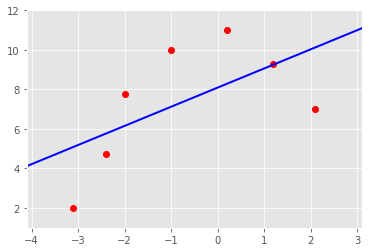

In [6]:
## First attempt - do linear regression on a non-linear dataset.
## Does not work well!

# The dataset is one I created to be a parabolic function with some noise.
x = [-3.1, -2.4, -2.0, -1.0, 0.2,  1.2, 2.1]
y = [ 2.0, 4.75, 7.75, 10.0, 11.0, 9.3, 7.0]

# axis ranges
xmin=min(x)-1
xmax=max(x)+1
ymin=min(y)-1
ymax=max(y)+1

# Initialise theta0 and theta0
theta0 = 20.0
theta1 = -1.0

(plotfig, plotax) = initPlot()

# Perform the gradient descent
batch_gradient_descent(x, y, 0.1, 1e-6, 12000)

# The plot below is the result of an attempt to do linear regression highly nonlinear data.


Finished after  2679  iterations: theta_0= 10.95143613372395 , theta_1= -0.9466625178168077


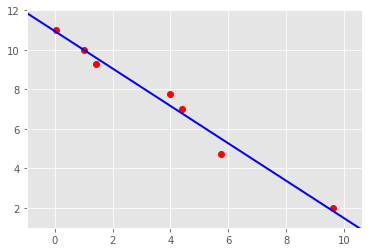

In [7]:
## Second attempt - very basic polynomial regression.
## We just create a single new parameter by squaring the original one,
## and apply this to the original simple linear regression code.

# The dataset is one I created to be a parabolic function with some noise.
x_orig = [-3.1, -2.4, -2.0, -1.0, 0.2,  1.2, 2.1]
y = [ 2.0, 4.75, 7.75, 10.0, 11.0, 9.3, 7.0]

# Set up a new set of x parameters by squaring the orignal x values
x = [val**2 for val in x_orig]

# axis ranges
xmin=min(x)-1
xmax=max(x)+1
ymin=min(y)-1
ymax=max(y)+1

# Initialise theta0 and theta0
theta0 = 20.0
theta1 = -1.0

(plotfig, plotax) = initPlot()

# Perform the gradient descent
batch_gradient_descent(x, y, 0.01, 1e-6, 12000)

# The plot below is in the transformed space where x is replaced by x**2: 
# you will see that the data are approximately linear, so linear regression works fine.

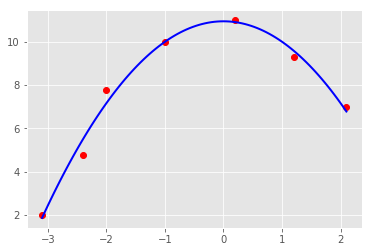

In [8]:
# Here is what the polynomial hypothesis looks like in the original untransformed space.

fig2 = plt.figure()
ax = fig2.add_subplot(111)

# To plot the polynomial hypothesis function, generate 100 x-values in the range,
# compute the value of the hypothesis function for each one, and plot them.
fnx = np.linspace(x_orig[0], x_orig[-1], 100) # 100 linearly spaced numbers
fny = [theta0 + theta1 * val**2 for val in fnx]  # computing the output of the polynomial functin

ax.plot(x_orig, y, 'ro')
ax.plot(fnx, fny, color='b', linestyle='-', linewidth=2)
